
# Explore and structure data

In [110]:
!pip install fastai
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.structured import *
from fastai.column_data import *

In [111]:
#!pip install kaggle

#from googleapiclient.discovery import build
#import io, os
#from googleapiclient.http import MediaIoBaseDownload
#from google.colab import auth
#auth.authenticate_user()

#!mkdir -p ~/.kaggle
#!mv kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#!mkdir data

In [112]:
#!kaggle competitions download -c competitive-data-science-predict-future-sales --force

In [113]:
#!gunzip sample_submission.csv.gz
#!gunzip sales_train.csv.gz
#!gunzip test.csv.gz

In [114]:
#!mv shops.csv data
#!mv items.csv data
#!mv item_categories.csv data
#!mv sales_train_v2.csv data
#!mv sample_submission.csv data
#!mv test.csv data

In [115]:
PATH = 'data/'

In [116]:
pd.read_csv('data/sample_submission.csv').head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [117]:
from IPython.display import HTML, display
PATH = "data/"
table_names = ['sales_train_v2', 'shops', 'items', 'item_categories', 'test']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

for t in tables: display(t.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [118]:
train, shops, items, cats, test = tables

In [119]:
for t in test, train: display(DataFrameSummary(t).summary()) 

,ID,shop_id,item_id
count,214200,214200,214200
mean,107100,31.6429,11019.4
std,61834.4,17.5619,6252.64
min,0,2,30
25%,53549.8,16,5381.5
50%,107100,34.5,11203
75%,160649,47,16071.5
max,214199,59,22167
counts,214200,214200,214200
uniques,214200,42,5100


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,NaN,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06,2.93585e+06
mean,NaN,14.5699,33.0017,10197.2,890.853,1.24264
std,NaN,9.42299,16.227,6324.3,1729.8,2.61883
min,NaN,0,0,0,-1,-22
25%,NaN,7,22,4476,249,1
50%,NaN,14,31,9343,399,1
75%,NaN,23,47,15684,999,1
max,NaN,33,59,22169,307980,2169
counts,2935849,2935849,2935849,2935849,2935849,2935849
uniques,1034,34,60,21807,19993,198


In [120]:
len(train)

2935849

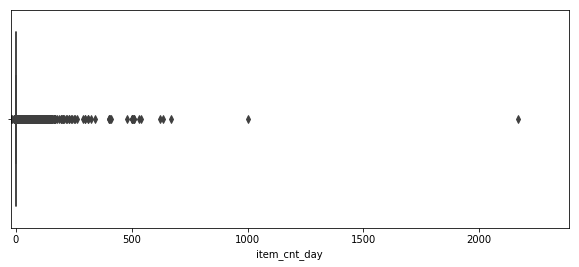

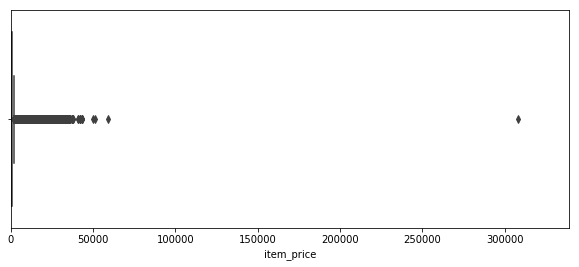

In [121]:
plt.figure(figsize=(10,4))
plt.xlim(train.item_cnt_day.min(), train.item_cnt_day.max()*1.1)
sns.boxplot(x=train.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(train['item_price'].min(), train['item_price'].max()*1.1)
sns.boxplot(x=train.item_price)

In [122]:
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1000]

In [123]:
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [124]:
shops.loc[shops['shop_name'] == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'
shops['city'] = shops['shop_name'].str.split(' ').map(lambda x: x[0])
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])
shops = shops[['shop_id','city_code']]

cats['split'] = cats['item_category_name'].str.split('-')
cats['type'] = cats['split'].map(lambda x: x[0].strip())
cats['type_code'] = LabelEncoder().fit_transform(cats['type'])
# if subtype is nan then type
cats['subtype'] = cats['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
cats['subtype_code'] = LabelEncoder().fit_transform(cats['subtype'])
cats = cats[['item_category_id','type_code', 'subtype_code']]

items.drop(['item_name'], axis=1, inplace=True)

In [125]:
len(list(set(test.item_id) - set(test.item_id).intersection(set(train.item_id)))), len(list(set(test.item_id))), len(test)

(363, 5100, 214200)

In [126]:
#train = train.drop('item_price', axis=1)

In [127]:
train_items = train['item_id'].unique()

In [128]:
test_items = test['item_id'].unique()

In [129]:
len(train['item_id'].unique())

21806

In [130]:
len(test['item_id'].unique())

5100

In [131]:
train_shops = train['shop_id'].unique()

In [132]:
test_shops = test['shop_id'].unique()

In [133]:
train = train.where(train['shop_id'].isin(test_shops)).dropna()

In [134]:
len(train['shop_id'].unique())

42

In [135]:
len(test['shop_id'].unique())

42

In [136]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0.0,59.0,22154.0,999.00,1.0
1,03.01.2013,0.0,25.0,2552.0,899.00,1.0
2,05.01.2013,0.0,25.0,2552.0,899.00,-1.0
3,06.01.2013,0.0,25.0,2554.0,1709.05,1.0
4,15.01.2013,0.0,25.0,2555.0,1099.00,1.0


In [137]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [138]:
len(train), len(test)

(2429277, 214200)

In [139]:
train['date'].min(), train['date'].max()

('01.01.2013', '31.12.2014')

In [140]:
test['date_block_num'] = pd.to_datetime('01.01.2015')

In [141]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [142]:
len(train['item_id'].unique()), len(test['item_id'].unique())

(21085, 5100)

In [143]:
train_df = train.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).agg(
                         {'item_cnt_day':'sum', 'item_price':'mean'})

In [144]:
train_df[train_df['item_cnt_day']<-9]

,date_block_num,shop_id,item_id,item_cnt_day,item_price
6139,0.0,12.0,1590.0,-13.0,2599.0
457985,10.0,12.0,8023.0,-22.0,15.0


In [145]:
train_df['item_cnt_day'] = train_df['item_cnt_day']+23

In [146]:
len(train_df['item_id'].unique()), len(test['item_id'].unique())

(21085, 5100)

In [147]:
train_df['date_block_num'] = train_df.apply(lambda x: pd.to_datetime('01-01-2013') + 
                                            pd.DateOffset(months = x['date_block_num'] + 1), axis=1)

In [148]:
train_df.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_price
0,2013-02-01,2.0,27.0,24.0,2499.0
1,2013-02-01,2.0,33.0,24.0,499.0
2,2013-02-01,2.0,317.0,24.0,299.0
3,2013-02-01,2.0,438.0,24.0,299.0
4,2013-02-01,2.0,471.0,25.0,399.0


In [149]:
#add_datepart(train_df, "date_block_num", drop=True)
#add_datepart(test, "date_block_num", drop=True)

In [150]:
train_df['date_block_num'].unique()

array(['2013-02-01T00:00:00.000000000', '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2015-02-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-

In [151]:
train_df = pd.merge(train_df, shops, on=['shop_id'], how='left')
train_df = pd.merge(train_df, items, on=['item_id'], how='left')
train_df = pd.merge(train_df, cats, on=['item_category_id'], how='left')
train_df['city_code'] = train_df['city_code'].astype(np.int8)
train_df['item_category_id'] = train_df['item_category_id'].astype(np.int8)
train_df['type_code'] = train_df['type_code'].astype(np.int8)
train_df['subtype_code'] = train_df['subtype_code'].astype(np.int8)


In [152]:
test = pd.merge(test, shops, on=['shop_id'], how='left')
test = pd.merge(test, items, on=['item_id'], how='left')
test = pd.merge(test, cats, on=['item_category_id'], how='left')
test['city_code'] = test['city_code'].astype(np.int8)
test['item_category_id'] = test['item_category_id'].astype(np.int8)
test['type_code'] = test['type_code'].astype(np.int8)
test['subtype_code'] = test['subtype_code'].astype(np.int8)

In [153]:
train_df = train_df.where(train_df['item_id'].isin(test_items)).dropna()
train_df = pd.concat([train_df,test], sort=False).drop_duplicates().reset_index(drop=True)
train_df.drop('ID', 1, inplace=True)

In [154]:
len(test.item_id.unique())

5100

In [155]:
temp = train_df.groupby(['item_id'], as_index=False).agg({'item_cnt_day':'sum', 'item_price':'mean'})

In [156]:
temp.head()

,item_id,item_cnt_day,item_price
0,30.0,10699.0,263.590124
1,31.0,10773.0,514.417212
2,32.0,16588.0,223.206066
3,33.0,11514.0,242.330000
4,38.0,1223.0,2353.156863


In [157]:
test['item_price'] = test['item_id'].map(temp.set_index(['item_id'])['item_price'])

In [158]:
len(train_df['item_id'].unique()), len(test['item_id'].unique())

(5100, 5100)

In [159]:
test_df = test

In [160]:
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day', 'item_price',
       'city_code', 'item_category_id', 'type_code', 'subtype_code'],
      dtype='object')

In [161]:
train_df.rename(index=str, columns={"item_cnt_day": "item_cnt_month"}, inplace=True)
train_df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'item_price',
       'city_code', 'item_category_id', 'type_code', 'subtype_code'],
      dtype='object')

In [162]:
train_df.head(10)

,date_block_num,shop_id,item_id,item_cnt_month,item_price,city_code,item_category_id,type_code,subtype_code
0,2013-02-01,2.0,33.0,24.0,499.0,0.0,37.0,11.0,1.0
1,2013-02-01,2.0,482.0,24.0,3300.0,0.0,73.0,15.0,0.0
2,2013-02-01,2.0,491.0,24.0,600.0,0.0,73.0,15.0,0.0
3,2013-02-01,2.0,839.0,24.0,3300.0,0.0,73.0,15.0,0.0
4,2013-02-01,2.0,1007.0,26.0,449.0,0.0,67.0,14.0,52.0
5,2013-02-01,2.0,1010.0,24.0,449.0,0.0,67.0,14.0,52.0
6,2013-02-01,2.0,1023.0,25.0,299.0,0.0,67.0,14.0,52.0
7,2013-02-01,2.0,1204.0,24.0,299.0,0.0,55.0,13.0,2.0
8,2013-02-01,2.0,1224.0,24.0,399.0,0.0,55.0,13.0,2.0
9,2013-02-01,2.0,1247.0,24.0,299.0,0.0,55.0,13.0,2.0


In [163]:
train_df.head().T.head(40)

,0,1,2,3,4
date_block_num,2013-02-01 00:00:00,2013-02-01 00:00:00,2013-02-01 00:00:00,2013-02-01 00:00:00,2013-02-01 00:00:00
shop_id,2,2,2,2,2
item_id,33,482,491,839,1007
item_cnt_month,24,24,24,24,26
item_price,499,3300,600,3300,449
city_code,0,0,0,0,0
item_category_id,37,73,73,73,67
type_code,11,15,15,15,14
subtype_code,1,0,0,0,52


In [164]:
train_df['item_cnt_month'].mean()

25.68975883592467

In [165]:
len(train_df), len(test_df)

(815948, 214200)

In [166]:
dep = 'item_cnt_month'
test_df[dep] = 0

In [167]:
cat_vars = ['shop_id', 'item_id', 'city_code', 'item_category_id', 'type_code', 'subtype_code']

contin_vars = ['item_price'] #'item_price'

n = len(train_df); n

815948

In [168]:
train_df = train_df[cat_vars+contin_vars+[dep, 'date_block_num']].copy()

In [169]:
test_df.isna().any()

ID                  False
shop_id             False
item_id             False
date_block_num      False
city_code           False
item_category_id    False
type_code           False
subtype_code        False
item_price           True
item_cnt_month      False
dtype: bool

In [170]:
test_df = test_df[cat_vars+contin_vars+[dep, 'date_block_num', 'ID']].copy()
test_df.head()

,shop_id,item_id,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month,date_block_num,ID
0,5,5037,3,19,5,10,1920.154628,0,2015-01-01,0
1,5,5320,3,55,13,2,NaN,0,2015-01-01,1
2,5,5233,3,19,5,10,845.070116,0,2015-01-01,2
3,5,5232,3,23,5,16,791.506867,0,2015-01-01,3
4,5,5268,3,20,5,11,NaN,0,2015-01-01,4


In [171]:
imputer = Imputer()
train_df[contin_vars+[dep]] = imputer.fit_transform(train_df[contin_vars+[dep]])
test_df[contin_vars] = imputer.fit_transform(test_df[contin_vars])

for v in contin_vars:
    train_df[v] = train_df[v].astype('float32')
    test_df[v] = test_df[v].astype('float32')
    
train_df[dep] = train_df[dep].astype('float32')
test_df[dep] = test_df[dep].astype('float32')

In [172]:
for v in cat_vars: train_df[v] = train_df[v].astype('category').cat.as_ordered()
    
train_df['date_block_num'] = train_df['date_block_num'].astype('category').cat.as_ordered()
test_df['date_block_num'] = test_df['date_block_num'].astype('category').cat.as_ordered()

In [174]:
train_df['date_block_num'] =  pd.to_datetime(train_df['date_block_num'])
test_df['date_block_num'] = pd.to_datetime(test_df['date_block_num'])

In [175]:
apply_cats(test_df, train_df)

In [176]:
len(train_df), len(train_df)/5

(815948, 163189.6)

In [177]:
train_df.isna().sum(), test_df.isna().sum()

(shop_id             0
 item_id             0
 city_code           0
 item_category_id    0
 type_code           0
 subtype_code        0
 item_price          0
 item_cnt_month      0
 date_block_num      0
 dtype: int64, shop_id             0
 item_id             0
 city_code           0
 item_category_id    0
 type_code           0
 subtype_code        0
 item_price          0
 item_cnt_month      0
 date_block_num      0
 ID                  0
 dtype: int64)

In [178]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815948 entries, 0 to 815947
Data columns (total 9 columns):
shop_id             815948 non-null category
item_id             815948 non-null category
city_code           815948 non-null category
item_category_id    815948 non-null category
type_code           815948 non-null category
subtype_code        815948 non-null category
item_price          815948 non-null float32
item_cnt_month      815948 non-null float32
date_block_num      815948 non-null datetime64[ns]
dtypes: category(6), datetime64[ns](1), float32(2)
memory usage: 24.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 10 columns):
shop_id             214200 non-null category
item_id             214200 non-null category
city_code           214200 non-null category
item_category_id    214200 non-null category
type_code           214200 non-null category
subtype_code        214200 non-null category
item_price          214200 non-

(None, None)

In [179]:
samp_size = n
len(train_df)

815948

In [180]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815948 entries, 0 to 815947
Data columns (total 9 columns):
shop_id             815948 non-null category
item_id             815948 non-null category
city_code           815948 non-null category
item_category_id    815948 non-null category
type_code           815948 non-null category
subtype_code        815948 non-null category
item_price          815948 non-null float32
item_cnt_month      815948 non-null float32
date_block_num      815948 non-null datetime64[ns]
dtypes: category(6), datetime64[ns](1), float32(2)
memory usage: 24.3+ MB


In [181]:
len(train_df)

815948

In [182]:
len(test_df)

214200

In [ ]:
#train_df.reset_index(inplace=True)
#test_df.reset_index(inplace=True)

#train_df.to_feather("train")
#test_df.to_feather("test")

In [ ]:
# This is only for loading existing preprocessed Dataframes (Dataframes will be read-only)
#train_df = pd.read_feather("train")
#test_df = pd.read_feather("test")

In [7]:
#train_df.drop('index', 1, inplace=True)
#test_df.drop('index', 1, inplace=True)

In [183]:
joined_samp = train_df.sort_values(by='date_block_num')
joined_samp = joined_samp.set_index('date_block_num')

In [184]:
joined_samp.head() 

,shop_id,item_id,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month
date_block_num,,,,,,,,
2013-02-01,2.0,33.0,0.0,37.0,11.0,1.0,499.000,24.0
2013-02-01,42.0,5572.0,19.0,2.0,1.0,10.0,1589.875,27.0
2013-02-01,42.0,5552.0,19.0,55.0,13.0,2.0,299.000,24.0
2013-02-01,42.0,5539.0,19.0,55.0,13.0,2.0,299.000,24.0
2013-02-01,42.0,5472.0,19.0,60.0,13.0,48.0,9599.000,24.0


In [185]:
joined_samp.isna().any()

shop_id             False
item_id             False
city_code           False
item_category_id    False
type_code           False
subtype_code        False
item_price          False
item_cnt_month      False
dtype: bool

In [186]:
joined_samp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 815948 entries, 2013-02-01 to 2015-11-01
Data columns (total 8 columns):
shop_id             815948 non-null category
item_id             815948 non-null category
city_code           815948 non-null category
item_category_id    815948 non-null category
type_code           815948 non-null category
subtype_code        815948 non-null category
item_price          815948 non-null float32
item_cnt_month      815948 non-null float32
dtypes: category(6), float32(2)
memory usage: 18.1 MB


In [187]:
df, y, nas, mapper = proc_df(joined_samp, 'item_cnt_month', do_scale=True)

In [188]:
joined_test = test_df.sort_values('date_block_num')
joined_test = joined_test.set_index('date_block_num')

In [190]:
len(joined_test)

214200

In [191]:
joined_test.isna().any()

shop_id             False
item_id             False
city_code           False
item_category_id    False
type_code           False
subtype_code        False
item_price          False
item_cnt_month      False
ID                  False
dtype: bool

In [192]:
df_test, _, nas, mapper = proc_df(joined_test, 'item_cnt_month', do_scale=True, 
                                  skip_flds=['ID'], mapper=mapper, na_dict=nas)

In [193]:
len(df_test)

214200

In [194]:
from sklearn.metrics import mean_squared_error

def exp_rmse(y_pred, targ):
    return math.sqrt(mean_squared_error(targ, y_pred))

In [195]:
len(y)

815948

In [196]:
yl = np.log(y)
max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [197]:
train_df['date_block_num'].max()

Timestamp('2015-11-01 00:00:00')

In [198]:
train_df['date_block_num'].min()

Timestamp('2013-02-01 00:00:00')

In [199]:
val_idx = train_df[train_df['date_block_num'] >= '2015-04-01'].index

len(val_idx), #len(idxs), (len(val_idx)/len(idxs))*100

(205593,)

In [200]:
val_idx = val_idx.astype('int')

In [201]:
len(val_idx), len(y), len(df), len(df_test)

(205593, 815948, 815948, 214200)

In [211]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl, cat_flds=cat_vars, bs=256,
                                       test_df=df_test)

In [212]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [213]:
cat_sz

[('shop_id', 43),
 ('item_id', 5101),
 ('city_code', 29),
 ('item_category_id', 63),
 ('type_code', 17),
 ('subtype_code', 50)]

In [214]:
emb_szs = [(c, max(10, min(50, (c+1)//2))) for _,c in cat_sz]

In [215]:
emb_szs

[(43, 22), (5101, 50), (29, 15), (63, 32), (17, 10), (50, 25)]

In [216]:
df.isna().any()

shop_id             False
item_id             False
city_code           False
item_category_id    False
type_code           False
subtype_code        False
item_price          False
dtype: bool

In [217]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [218]:
lr = 1e-4
m.lr_find()

 58%|██████████████████████████████████████▏                           | 1381/2385 [00:15<00:11, 87.80it/s, loss=0.127]

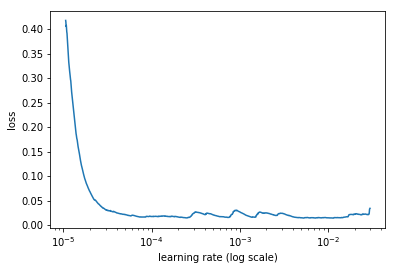

In [219]:
m.sched.plot()

In [220]:
lr = 10 ** -4.8

In [221]:
lr

1.584893192461114e-05

In [222]:
len(val_idx), len(yl), len(df), len(df_test)

(205593, 815948, 815948, 214200)

 58%|██████████████████████████████████████▏                           | 1381/2385 [00:34<00:25, 39.57it/s, loss=0.127]

In [223]:
m.fit(lr, 3, cycle_len = 1, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.014792   0.008283   0.081079  
    1      0.012554   0.006673   0.073577                                                                              
    2      0.010777   0.006118   0.070661                                                                              


[array([0.00612]), 0.07066054586257169]

In [224]:
m.save("predict_sales_3E")

In [64]:
m.load("predict_sales_3E")

In [225]:
m.fit(lr, 1, cycle_len = 5, cycle_mult = 1, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.010967   0.00577    0.068478  
    1      0.011184   0.005668   0.068022                                                                              
    2      0.009579   0.005456   0.066291                                                                              
    3      0.009253   0.005448   0.066421                                                                              
    4      0.00917    0.005418   0.066247                                                                              


[array([0.00542]), 0.06624654570506482]

In [226]:
m.save("predict_sales_8E") 

In [67]:
m.load("predict_sales_8E")

In [227]:
m.fit(lr, 3, cycle_len = 1, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.008883   0.005363   0.065829  
    1      0.009433   0.005437   0.066103                                                                              
    2      0.00936    0.005259   0.065154                                                                              
    3      0.009445   0.005141   0.063879                                                                              
    4      0.008852   0.005313   0.065719                                                                              
    5      0.008347   0.005201   0.064945                                                                              
    6      0.007962   0.005111   0.064021                                                                              


[array([0.00511]), 0.06402095948733212]

In [228]:
m.save("predict_sales_8E_7ER") 

In [70]:
m.load("predict_sales_8E_7ER")

In [229]:
m.fit(lr, 3, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.008469   0.005086   0.064022  
    1      0.008123   0.005065   0.063669                                                                              
    2      0.008265   0.005502   0.065301                                                                              
    3      0.008788   0.0051     0.063917                                                                              
    4      0.007448   0.004952   0.062556                                                                              
    5      0.007844   0.004992   0.062954                                                                              
    6      0.007706   0.004914   0.062293                                                                              
    7      0.008859   0.005491   0.064789                                                                           

[array([0.00486]), 0.06191694792556138]

In [230]:
m.save("predict_sales_8E_21ER") 

In [74]:
m.load("predict_sales_8E_21ER")

In [231]:
m.fit(lr, 2, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.007105   0.004919   0.062695  
    1      0.007448   0.004823   0.061649                                                                              
    2      0.008686   0.004923   0.061937                                                                              
    3      0.007602   0.004806   0.061387                                                                              
    4      0.007662   0.00477    0.061068                                                                              
    5      0.007504   0.004803   0.061528                                                                              


[array([0.0048]), 0.06152753631035912]

In [232]:
m.save("predict_sales_8E_21ER_27ER") 

In [ ]:
m.load("predict_sales_8E_21ER_27ER") 

In [233]:
m.fit(lr, 2, cycle_len = 5, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.007878   0.004912   0.062644  
    1      0.006889   0.004877   0.062056                                                                              
    2      0.006957   0.004708   0.060373                                                                              
    3      0.007154   0.004752   0.060973                                                                              
    4      0.006819   0.004767   0.061224                                                                              
    5      0.007551   0.004728   0.059705                                                                              
    6      0.007403   0.004769   0.061237                                                                              
    7      0.007569   0.0049     0.062735                                                                           

[array([0.00468]), 0.060548018789470116]

In [234]:
m.save("predict_sales_8E_21ER_36ER_15ER") 

In [235]:
m.fit(lr, 2, cycle_len = 6, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.007258   0.004802   0.06172   
    1      0.007134   0.004738   0.060909                                                                              
    2      0.007326   0.004769   0.061508                                                                              
    3      0.007878   0.004591   0.05956                                                                               
    4      0.006995   0.004675   0.060646                                                                              
    5      0.007137   0.004652   0.060345                                                                              
    6      0.006548   0.004897   0.063085                                                                              
    7      0.007061   0.004701   0.061064                                                                           

[array([0.0046]), 0.059849499966171615]

In [236]:
m.save("predict_sales_8E_21ER_36ER_30ER") 

In [237]:
m.fit(lr, 3, cycle_len = 3, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.007282   0.004559   0.059435  
    1      0.007207   0.004524   0.059161                                                                              
    2      0.006675   0.004582   0.059682                                                                              
    3      0.00767    0.004511   0.058567                                                                              
    4      0.007189   0.004584   0.059777                                                                              
    5      0.006499   0.004541   0.058881                                                                              
    6      0.006437   0.004606   0.059975                                                                              
    7      0.006531   0.004571   0.059597                                                                           

[array([0.00453]), 0.05922335957844767]

In [82]:
lr = 1e-5

In [81]:
m.load("predict_sales_8E_21ER_36ER_10ER") 

In [240]:
m.fit(lr, 5, cycle_len = 2, cycle_mult = 2, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      0.006643   0.004432   0.057992  
    1      0.005929   0.004508   0.058954                                                                              
    2      0.006267   0.004417   0.057664                                                                              
    3      0.006676   0.004445   0.058325                                                                              
    4      0.006796   0.004536   0.059229                                                                              
    5      0.006622   0.004522   0.059134                                                                              
    6      0.006748   0.004569   0.059609                                                                              
    7      0.00645    0.004439   0.058056                                                                           

[array([0.00457]), 0.05941538455236232]

In [241]:
m.save("predict_sales_8E_21ER_36ER_10ER_6ER_61ER") 

In [242]:
m.load("predict_sales_8E_21ER_36ER_10ER_6ER_61ER") 

In [ ]:
# current best model: predict_sales_8E_21ER_36ER_10ER_6ER_61ER
m.load("predict_sales_8E_21ER_36ER_10ER_6ER_61ER") 

# Test Set

In [243]:
x,y=m.predict_with_targs()
x = torch.from_numpy(x)
y = torch.from_numpy(y)
exp_rmse(x,y)

#pred_test=m.predict(True)

0.06758650454899645

In [244]:
log_preds = m.predict(True)

In [245]:
log_preds

array([[3.19691],
       [3.18726],
       [3.17644],
       ...,
       [3.31827],
       [3.2001 ],
       [3.19361]], dtype=float32)

In [246]:
log_test = np.exp(log_preds)

In [247]:
log_test

array([[24.45679],
       [24.22189],
       [23.96132],
       ...,
       [27.6125 ],
       [24.53509],
       [24.37627]], dtype=float32)

In [248]:
log_test=log_test-23

In [249]:
log_test

array([[1.45679],
       [1.22189],
       [0.96132],
       ...,
       [4.6125 ],
       [1.53509],
       [1.37627]], dtype=float32)

In [250]:
len(test), len(df_test)

(214200, 214200)

In [251]:
test['item_cnt_month'] = log_test

In [252]:
test.head()

,ID,shop_id,item_id,date_block_num,city_code,item_category_id,type_code,subtype_code,item_price,item_cnt_month
0,0,5,5037,2015-01-01,3,19,5,10,1920.154628,1.456787
1,1,5,5320,2015-01-01,3,55,13,2,NaN,1.221891
2,2,5,5233,2015-01-01,3,19,5,10,845.070116,0.961317
3,3,5,5232,2015-01-01,3,23,5,16,791.506867,2.473574
4,4,5,5268,2015-01-01,3,20,5,11,NaN,1.127113


In [253]:
csv_fn=f'{PATH}/result/submission.csv'

test[['ID','item_cnt_month']].to_csv(csv_fn, index=False)

In [254]:
test[['ID','item_cnt_month']]

,ID,item_cnt_month
0,0,1.456787
1,1,1.221891
2,2,0.961317
3,3,2.473574
4,4,1.127113
5,5,1.235367
6,6,1.184078
7,7,1.855326
8,8,1.549616
9,9,2.360146
